In [119]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

Mounted at /content/drive/
/content/drive/My Drive/Thesis


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
from scipy.stats import truncnorm

In [ ]:
norm.pdf(0, loc = 0,scale = 1)

0.3989422804014327

In [2]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

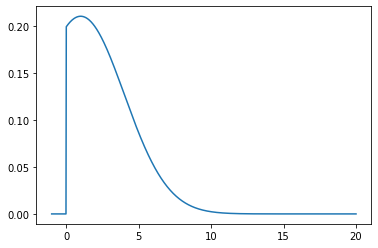

In [ ]:
x_range = np.linspace(-1,20,1000)
plt.plot(x_range, truncnorm.pdf(x_range, a,  b,loc = u,scale = sigma))

array([9.85863759, 3.73891763, 7.55762784, 2.06356072, 3.37583406,
       2.17459311, 4.28251915, 1.634819  , 5.41832426, 3.21032034,
       4.4926078 , 2.23490306, 1.29101739, 5.68772813, 3.78017689,
       1.58535553, 3.96133429, 4.39778074, 4.49351019, 3.36010814,
       3.54854353, 3.02023548, 1.51593038, 3.84524298, 4.40987021,
       2.62429503, 2.70805096, 1.80463035, 3.50635976, 3.38617791,
       2.71426696, 5.64488195, 3.29081986, 2.56232748, 4.63407828,
       4.9959239 , 6.69792692, 9.38756   , 3.43720886, 4.67023899,
       1.1369476 , 1.90824542, 1.62121721, 4.81274133, 4.77979779,
       4.00874949, 2.71295881, 2.89410114, 2.51200758, 6.43017869])

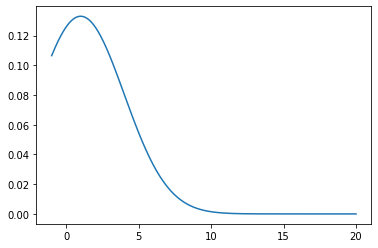

In [ ]:

plt.plot(x_range, norm.pdf(x_range, loc = u,scale = sigma))
truncnorm.rvs(a = 0, b = np.inf, loc = u,scale = sigma,size=50)

In [3]:
# Experiment 5:
# This time, we use truncated normal distribution

n=1000000
myclip_a = 0
myclip_b = np.inf
u = 1
sigma = 100000000

#computer alpha beta for truncated normal distribution
a, b = (myclip_a - u) / sigma, myclip_b

mean, var = truncnorm.stats(a, b,loc = u,scale = sigma, moments='mv')

data_norm = truncnorm.rvs(a, b, loc = u,scale = sigma,size=n)

#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

#not super accurate, but due to the character of cdf and pde maybe also factorial
#use virtual valuation  = 0 to solve optimal reserve price
def F(x):
   return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))

p_opt = fsolve(F, u)

#use the truncated normal distribution mean and standard deviation
r = np.sqrt(var)/mean

def f(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            
p_d = fsolve(f, [u])

reserve_p = p_d*mean/(2*p_d-1)

opt = auction_exp(data_norm,p_opt)
exp_revenue = auction_exp(data_norm,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Normal distribution DAPX = ' + str(DAPX))
print("Theoritical DAPX_normal:")
print(p_opt*(1-k*(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(reserve_p*(1-k*(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))))
print(p_opt*(1-(truncnorm.cdf(p_opt, a, b,loc = u,scale = sigma)))/(reserve_p*(1-(truncnorm.cdf(reserve_p, a, b,loc = u,scale = sigma)))))
r

worst case robust DAPX = [4.08363389]
Normal distribution DAPX = [1.15222471]
Theoritical DAPX_normal:
[1.15149946]
[1.15149946]


0.7555106385884287

In [ ]:
print(8.66666719)
print(r)
print(p_opt*(1-(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma))))
(reserve_p*(1-(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma))))
p_opt 
F(8.66666719)
p_opt = fsolve(F, mean)
p_opt
sigma
mean

8.66666719
nan
[nan]


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: divide by zero encountered in long_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1824: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array(nan)

In [22]:
u = 1

n=100000
DAPX_list = []
r_list = []
p_d_list = []
p_opt_list = []
sigma_list = []

def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

myclip_a = 0
myclip_b = np.inf

#for i in np.linspace(0, 10, 20):
#  sigma = 0.1 + i
for i in np.linspace(1, 6, 20):
  sigma = i + 0.01
  sigma_list.append(sigma)
  #computer alpha beta for truncated normal distribution
  a, b = (myclip_a - u) / sigma, myclip_b
  mean, var = truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
  r = np.sqrt(var)/mean
  r_list.append(r)

  data_tnorm = truncnorm.rvs(a, b, loc = u,scale = sigma,size=n)

  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price
  
  p_opt = fsolve(F, mean-1)
  print(F(p_opt))
  p_opt_list.append(p_opt)

      
  p_d = fsolve(f, [mean])
  print(f(p_d))
  p_d_list.append(p_d)

  reserve_p = p_d*mean/(2*p_d-1)
  opt = auction_exp(data_tnorm,p_opt)
  exp_revenue = auction_exp(data_tnorm,reserve_p)

  DAPX_list.append((opt/exp_revenue)[0])
  
  

[-2.22044605e-16]
[0.]
[-6.21724894e-15]
[0.]
[0.]
[-5.55111512e-17]
[2.22044605e-16]
[1.11022302e-16]
[0.]
[-8.8817842e-15]
[-5.2846616e-14]
[-3.88578059e-16]
[-7.54951657e-15]
[-5.55111512e-17]
[-8.8817842e-16]
[1.11022302e-16]
[0.]
[-1.11022302e-16]
[4.4408921e-16]
[1.11022302e-16]
[-4.4408921e-16]
[6.32827124e-15]
[-4.4408921e-16]
[1.11022302e-16]
[2.22044605e-15]
[0.]
[-4.4408921e-16]
[0.]
[-4.4408921e-16]
[0.]
[0.]
[1.11022302e-16]
[0.]
[4.4408921e-16]
[0.]
[2.99760217e-15]
[8.8817842e-16]
[1.17683641e-14]
[-1.77635684e-15]
[0.]


In [12]:
u = 1

n=100000
DAPX_list_1 = []
r_list_1 = []
p_d_list_1 = []
p_opt_list_1 = []
sigma_list_1 = []

def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

myclip_a = 0
myclip_b = np.inf
sigma = 0.1
#for i in np.linspace(0, 1, 20): for small r
#sigma = 0.01 + i
for i in np.linspace(0, 1, 20):
  sigma = 0.01 + i
  sigma_list_1.append(sigma)
  #computer alpha beta for truncated normal distribution
  a, b = (myclip_a - u) / sigma, myclip_b
  mean, var = truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
  r = np.sqrt(var)/mean
  r_list_1.append(r)

  data_tnorm = truncnorm.rvs(a, b, loc = u,scale = sigma,size=n)

  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price
  
  p_opt = fsolve(F, mean-0.1)
  print(F(p_opt))
  p_opt_list_1.append(p_opt)

  

     
  p_d = fsolve(f, [mean])
  print(f(p_d))
  p_d_list_1.append(p_d)

  reserve_p = p_d*mean/(2*p_d-1)
  opt = auction_exp(data_tnorm,p_opt)
  exp_revenue = auction_exp(data_tnorm,reserve_p)

  DAPX_list_1.append((opt/exp_revenue)[0])
  
  

[-1.55431223e-14]
[-1.43182449e-16]
[-1.22124533e-15]
[-1.22298005e-16]
[2.08721929e-14]
[-1.01307851e-14]
[2.08721929e-13]
[-2.77555756e-17]
[-4.67403893e-14]
[-8.21565038e-15]
[0.]
[0.]
[1.36557432e-14]
[-1.11022302e-16]
[0.]
[2.66453526e-15]
[1.11022302e-16]
[5.55111512e-17]
[3.20854454e-14]
[4.99600361e-16]
[1.11022302e-15]
[5.55111512e-17]
[4.4408921e-16]
[0.]
[1.11022302e-16]
[5.55111512e-17]
[-5.55111512e-16]
[5.55111512e-17]
[-3.33066907e-16]
[-3.99680289e-15]
[0.]
[-6.10622664e-16]
[0.]
[-1.11022302e-16]
[-7.63833441e-14]
[-5.55111512e-17]
[-3.37507799e-14]
[-5.55111512e-17]
[-1.70974346e-14]
[0.]


In [ ]:
x = np.linspace(0.7, 10, 100)

y = x-((1-truncnorm.cdf(x,a , b ,loc = u,scale = sigma))/truncnorm.pdf(x,a , b ,loc = u,scale = sigma))
plt.plot(x, y,color="green",label="Experimental DAPX")
truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
fsolve(F, 0.8)
F(0.90013163)

In [10]:
sigma_list

[1.0,
 1.263157894736842,
 1.526315789473684,
 1.7894736842105263,
 2.052631578947368,
 2.3157894736842106,
 2.5789473684210527,
 2.8421052631578947,
 3.1052631578947367,
 3.3684210526315788,
 3.631578947368421,
 3.894736842105263,
 4.157894736842105,
 4.421052631578947,
 4.684210526315789,
 4.947368421052632,
 5.2105263157894735,
 5.473684210526316,
 5.7368421052631575,
 6.0]

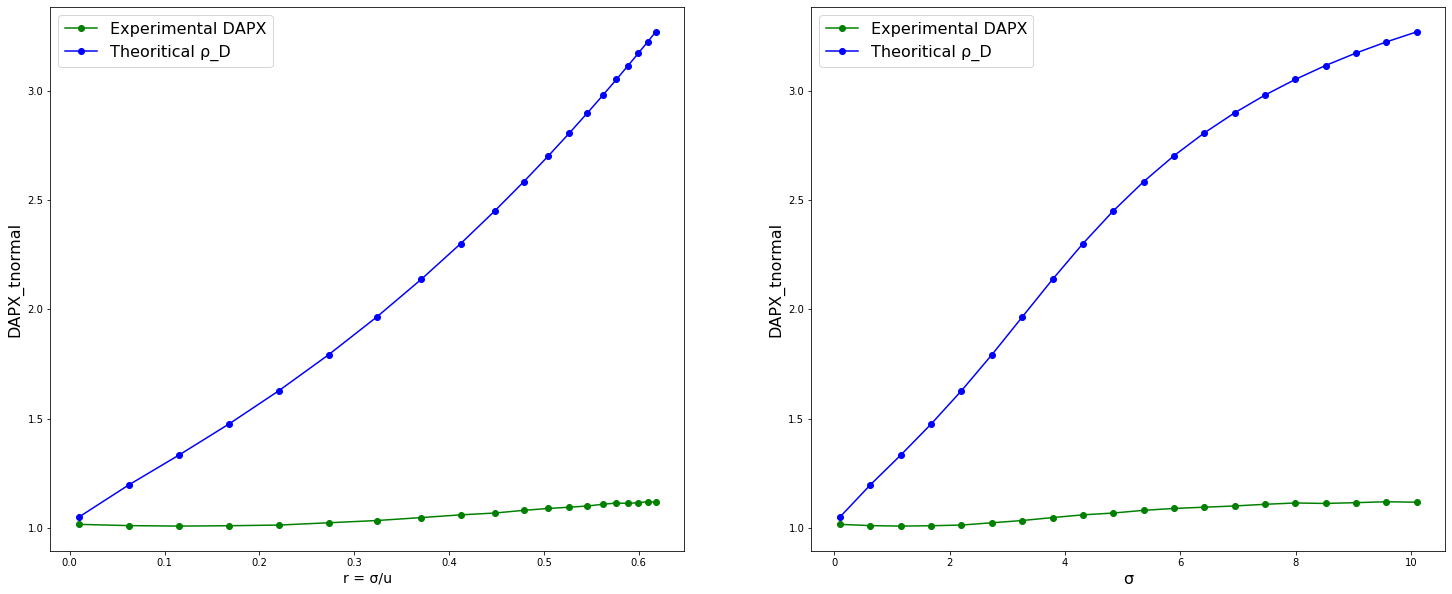

In [5]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list, DAPX_list,color="green",marker="o",label="Experimental DAPX")
ax1.set_xlabel("r = \u03C3/u",fontsize=14)
ax1.set_ylabel("DAPX_tnormal",fontsize=16)
ax1.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
ax2.plot(r_list, DAPX_list,color="green",marker="o",label="Experimental DAPX")
ax2.set_xlabel("\u03C3",fontsize=16)
ax2.set_ylabel("DAPX_tnormal",fontsize=16)
ax2.plot(sigma_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")

#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

ax1.legend(loc="upper left",fontsize = 16)
ax2.legend(loc="upper left",fontsize = 16)
plt.savefig("tnorm_dapx_r.png")
plt.show()


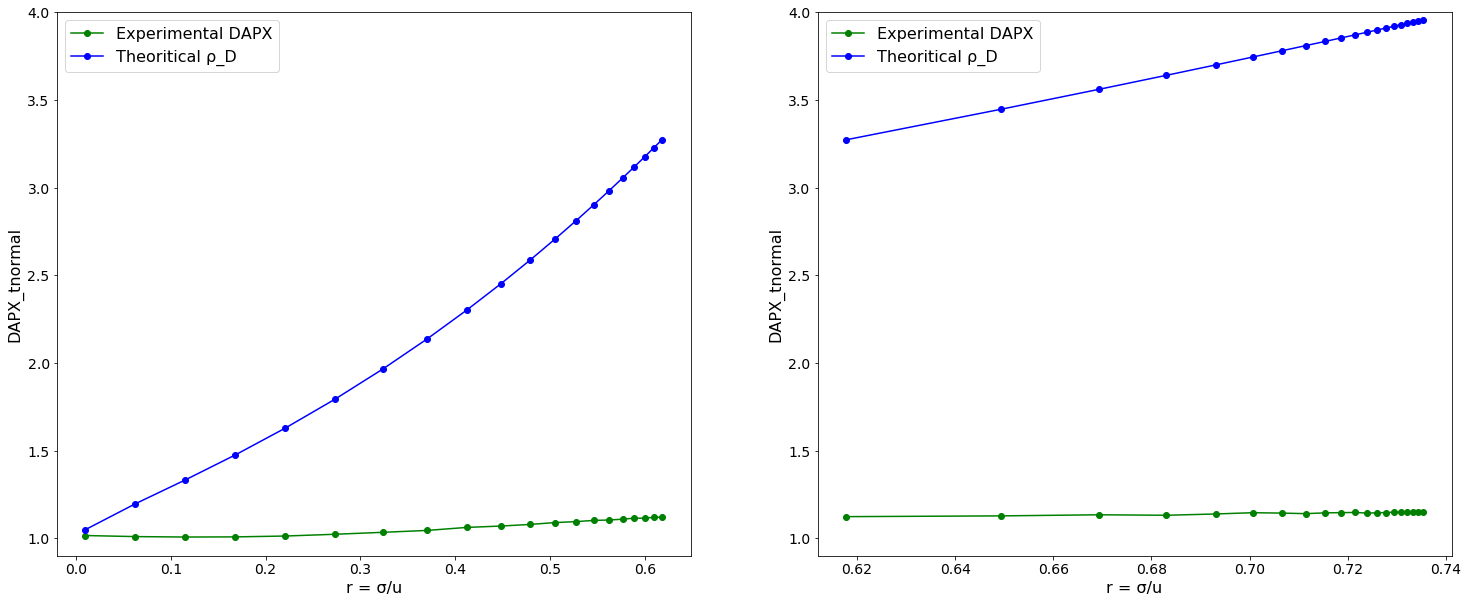

In [25]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(r_list_1, DAPX_list_1,color="green",marker="o",label="Experimental DAPX")
ax1.set_xlabel("r = \u03C3/u",fontsize=16)
ax1.tick_params(axis='x', labelsize= 14)
ax1.tick_params(axis='y', labelsize= 14)
ax1.set_ylabel("DAPX_tnormal",fontsize=16)
ax1.plot(r_list_1, p_d_list_1,color="blue",marker="o",label="Theoritical \u03C1_D")
ax1.set_ylim(0.9,4)
ax2.plot(r_list, DAPX_list,color="green",marker="o",label="Experimental DAPX")
ax2.set_xlabel("r = \u03C3/u",fontsize=16)
ax2.set_ylabel("DAPX_tnormal",fontsize=16)
ax2.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
ax2.tick_params(axis='x', labelsize= 14)
ax2.tick_params(axis='y', labelsize= 14)
ax2.set_ylim(0.9,4)
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

ax1.legend(loc="upper left",fontsize = 16)
ax2.legend(loc="upper left",fontsize = 16)
plt.savefig("tnorm_dapx_r.png")
plt.show()


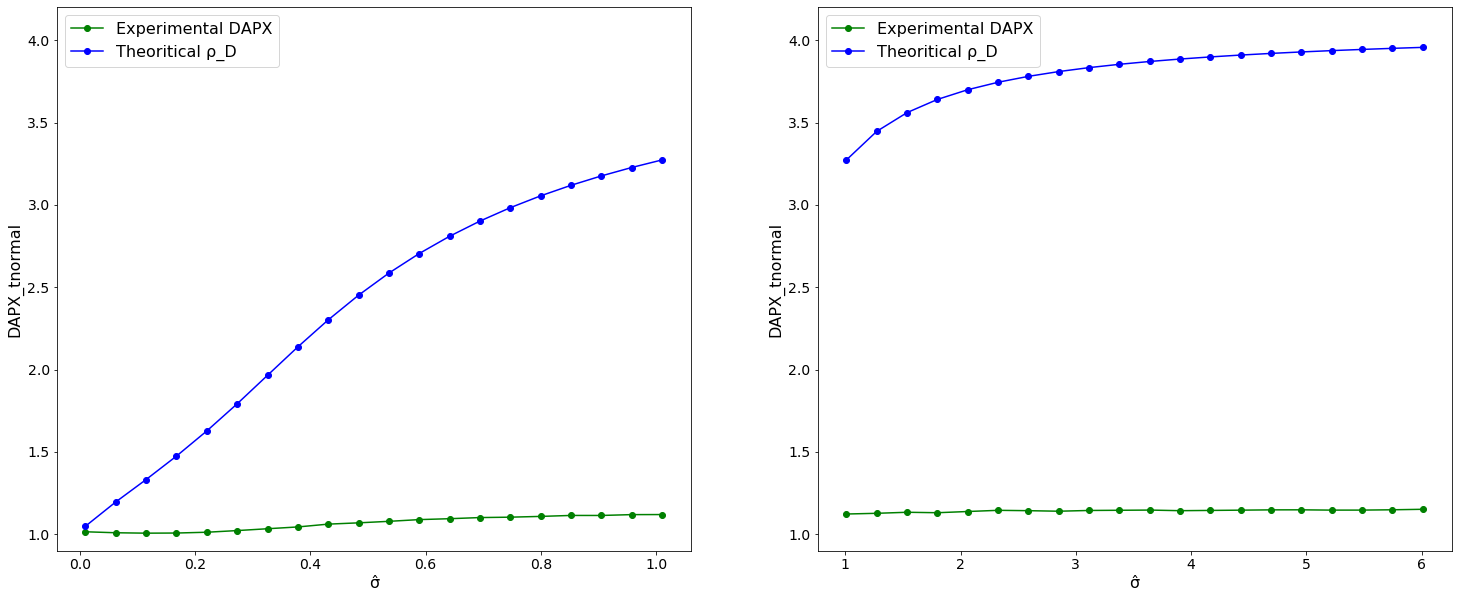

In [30]:
# create figure and axis objects with subplots()
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(25, 10))
# make a plot

ax1.plot(sigma_list_1, DAPX_list_1,color="green",marker="o",label="Experimental DAPX")
ax1.set_xlabel("\u03C3\u0302",fontsize=16)
ax1.set_ylabel("DAPX_tnormal",fontsize=16)
ax1.tick_params(axis='x', labelsize= 14)
ax1.tick_params(axis='y', labelsize= 14)
ax1.plot(sigma_list_1, p_d_list_1,color="blue",marker="o",label="Theoritical \u03C1_D")
ax1.set_ylim(0.9,4.2)
#ax1.set_title('u = 1',fontsize=18)
ax2.plot(sigma_list, DAPX_list,color="green",marker="o",label="Experimental DAPX")
ax2.set_xlabel("\u03C3\u0302",fontsize=16)
ax2.set_ylabel("DAPX_tnormal",fontsize=16)
ax2.plot(sigma_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
#ax2.set_title('u = 10',fontsize=18)
#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
ax2.tick_params(axis='x', labelsize= 14)
ax2.tick_params(axis='y', labelsize= 14)
ax1.legend(loc="upper left",fontsize = 16)
ax2.legend(loc="upper left",fontsize = 16)
ax2.set_ylim(0.9,4.2)
plt.savefig("tnorm_dapx_s.png")
plt.show()


In [ ]:
sigma = 3
DAPX_list1 = []
r_list1 = []
p_d_list1 = []
p_opt_list1 = []
def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2  
for i in np.arange(100):

  u = 1 + 0.05*i
  data = norm.rvs(loc = u,scale = sigma,size=n)
  #remove the negative samples
  data_norm = [item for item in data if item >= 0]
  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price


  p_opt = fsolve(F, u)
  p_opt_list1.append(p_opt)
  r = sigma/u
  r_list1.append(r)
 
            
  p_d = fsolve(f, [u])
  p_d_list1.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  opt = auction_exp(data_norm,p_opt)
  exp_revenue = auction_exp(data_norm,reserve_p)

  DAPX_list1.append((opt/exp_revenue)[0])


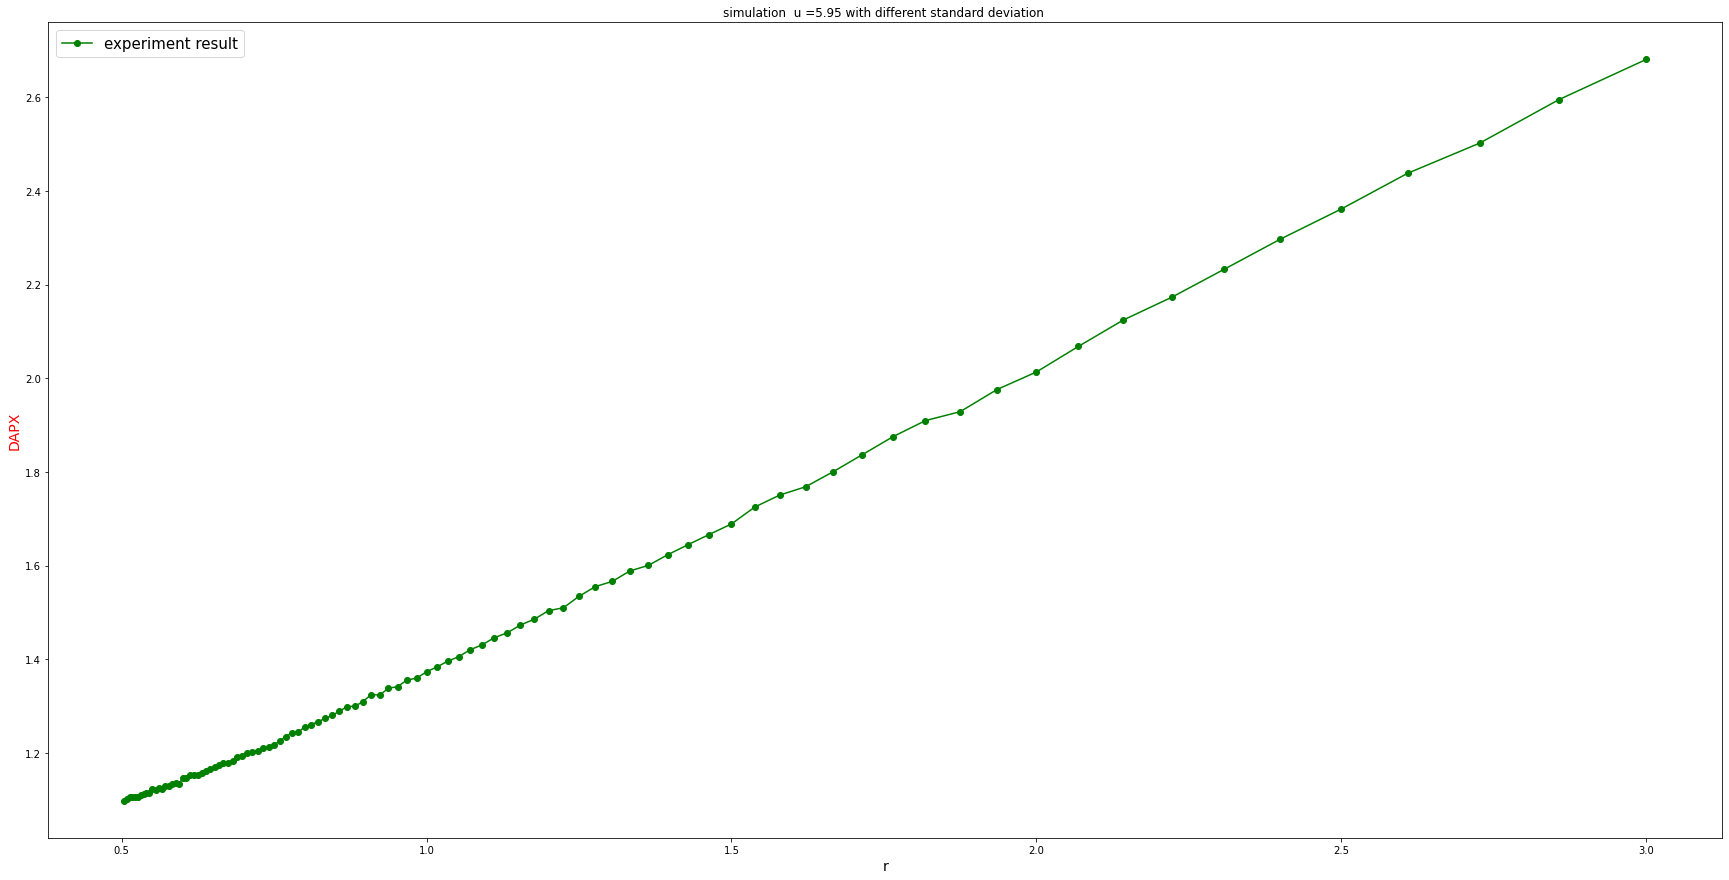

In [ ]:
 # create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(30, 15))
# make a plot
ax.plot(r_list1, DAPX_list1,color="green",marker="o",label="experiment result")
#ax.plot(r_list1, p_d_list1,color="blue",marker="o",label="Numerical solution")
plt.legend(loc="upper left",fontsize = 15)
# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX",color="red",fontsize=14)
#ax.set_ylim(0.7,1.2)

# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(sigma_list, diff,color="blue",marker="o")
#ax2.set_ylabel("difference",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.show()

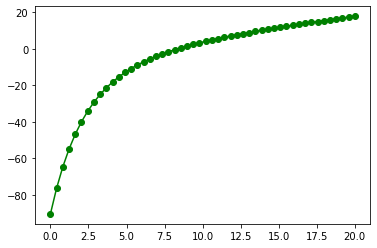

In [ ]:
u = 10
sigma = 5
v = np.linspace(0, 20, 50)

#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

phi = v - (1-k*norm.cdf(v, loc = u,scale = sigma) +k*norm.cdf(0, loc = u,scale = sigma))/(k*norm.pdf(v, loc = u,scale = sigma))
plt.plot(v, phi,color="green",marker="o")

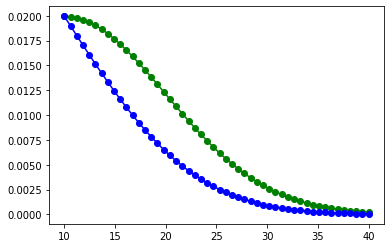

In [ ]:
u = 10
sigma = 10
v = np.linspace(10, 40, 50)
line1 = 0.5*norm.pdf(v, loc = u,scale = sigma)
line2 = norm.pdf(10, loc = u,scale = sigma)*(1-norm.cdf(v, loc = u,scale = sigma))
plt.plot(v, line1,color="green",marker="o",label="experiment result")
plt.plot(v, line2,color="blue",marker="o",label="experiment result")


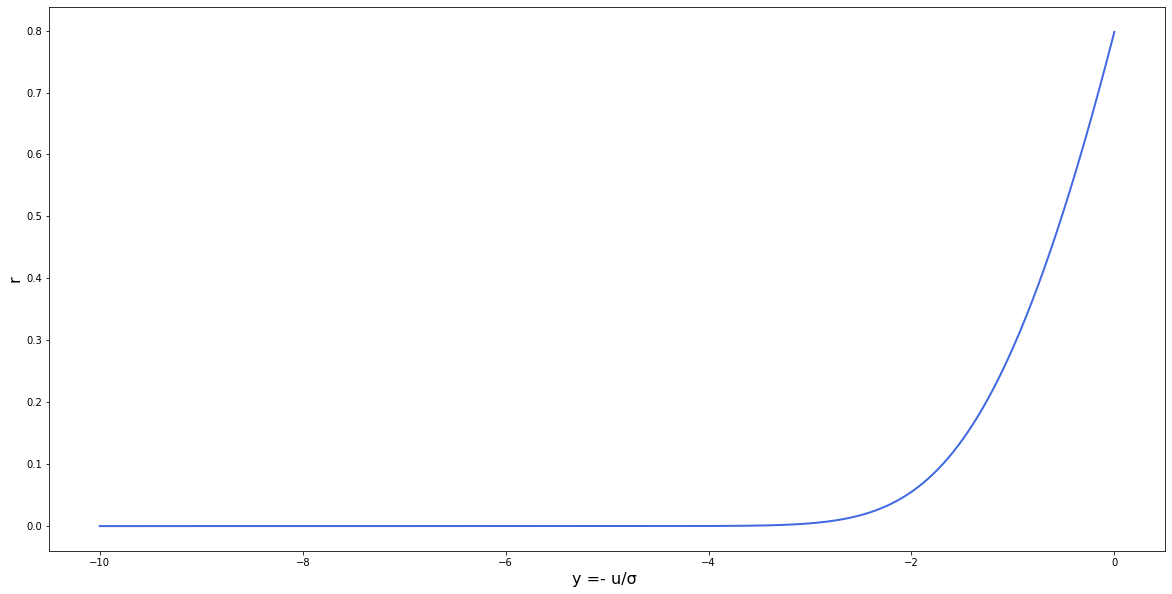

In [10]:
y = np.linspace(-10, 0, 1000)
h = norm.pdf(y)/(1-norm.cdf(y))
r = np.sqrt(1+y*h-h**2)/(-y +h)
test = y-h
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(y, h,color="royalblue", linewidth = 2)
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
#ax.set_ylim(0,1)
ax.set_xlabel("y =- u/\u03C3 ",fontsize=16)
# set y-axis label
ax.set_ylabel("r",fontsize=16)

#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.savefig("tnorn_r.png")
plt.show()


In [ ]:
k = 1/(1-norm.cdf(0,loc = u,scale = sigma))
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return -x*(1-k*norm.cdf(x, loc = u,scale = sigma))

x0 = 0.5
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
res.x


Optimization terminated successfully.
         Current function value: -1.743388
         Iterations: 33
         Function evaluations: 67


array([2.33401904])

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 3
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

array([1.49414051, 4.09347574])

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1



(array([7103., 7252., 7191., 7236., 7067., 6743., 6113., 5650., 4983.,
        4666., 4268., 3910., 3548., 3320., 2906., 2690., 2331., 2108.,
        1928., 1648., 1518., 1270., 1124.,  941.,  768.,  648.,  463.,
         337.,  197.,   74.]),
 array([1.00003932, 1.0666106 , 1.13318188, 1.19975316, 1.26632444,
        1.33289573, 1.39946701, 1.46603829, 1.53260957, 1.59918085,
        1.66575213, 1.73232342, 1.7988947 , 1.86546598, 1.93203726,
        1.99860854, 2.06517982, 2.13175111, 2.19832239, 2.26489367,
        2.33146495, 2.39803623, 2.46460751, 2.5311788 , 2.59775008,
        2.66432136, 2.73089264, 2.79746392, 2.8640352 , 2.93060649,
        2.99717777]),
 <a list of 30 Patch objects>)

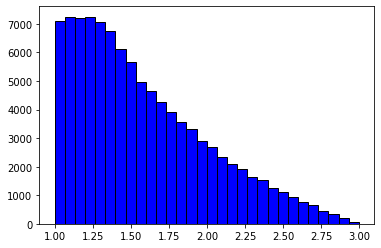

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))


In [ ]:
exp_revenue


2.121527270494244